In [ ]:
import tensorflow as tf   #tensorflow version 2.0 as it has builtin keras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tensorflow.keras import Sequential #
from tensorflow.keras.layers import Dense, Flatten
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [ ]:
#Flatten layer is to convert 2d array to 1d array  ie 28x28-->784
# MNIST Fashion Dataset
#ds_fasion_mnist= tf.keras.datasets.fashion_mnist
mnist_charachter = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test)  = mnist_charachter.load_data() #load dataset lables are output classes Tuple of Numpy arrays: 

#(x_train, y_train), (x_test, y_test)  = ds_fasion_mnist.load_data() #load dataset lables are output classes Tuple of Numpy arrays: 



#(x_train, y_train), (x_test, y_test)=RETURN TYPES
#x_train    input vector in training set
#y_train    output classes in training set----> supervised learning as o/p is given against i/p
#x_test     input vector in test set
#y_test     output classes in test set
#building models in tensorflow(we can make our network)---> 
#1- sequential-->BASIC APPROACH--ADD LAYERS SEQUENTIALY---define number of neurons and activation function on each layer
#2- Functional-->differnt models are integrated/mixed to represent advance level functions ie integrate deeplearning model with some other
# two model required for the question(what is this image about) 1- to understand question(made with sequential approach) 2-to classify this image(made with sequentia approach)
#--->resulting in one model after integrating output of both models. sequential approach canmot be used.
#3- Subclassing--> tensorflow 2.0 based on keras infrastructure we can inherit builtin classes to make new classes

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_charachter.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
print(x_train[0]) # first entry

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(np.max(x_train)) # to show maximum value as its a grey scale image

255


In [ ]:



print(np.mean(x_train))

33.318421449829934


In [ ]:
print(y_train)
# to recal fashion item object 
#fashion_items= ['T-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'Ankle boot']
#fashion_items[5] # to view item at index 5

[5 0 4 ... 5 6 8]


In [ ]:
x_train.shape # to find toatal records and size of each record



(60000, 28, 28)

In [ ]:
x_test.shape # to find test records and size of each record

(10000, 28, 28)

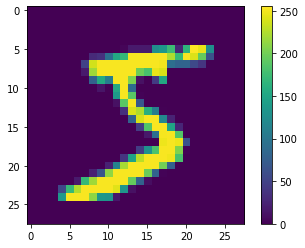

In [ ]:
# to find the image the records
plt.imshow(x_train[0])
plt.colorbar()

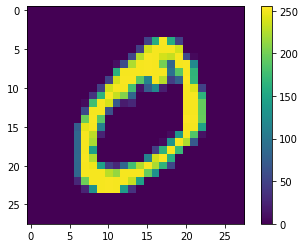

In [ ]:
plt.imshow(x_train[1])
plt.colorbar()

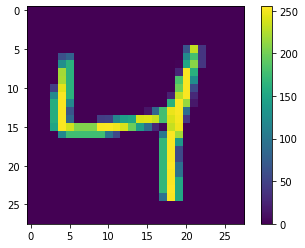

In [ ]:
plt.imshow(x_train[2])
plt.colorbar()

In [ ]:
# Now we wil construct our model lets build model i.e. a network
model = Sequential()  
model.add(Flatten(input_shape= (28, 28))) # A FLATTEN LAYER IS CONSTRUCTED DEFINED TO CONVERT 2D TO 1D DATA         input layer
model.add(Dense(50, activation='relu')) # its a hidden layer(relu is activarion function like sigmoid,softmax)   hidden layer
model.add(Dense(10, activation='softmax')) # its a ouput layer as no. of neurons= output class features          output layer
# each neuron in output layer is mapped with each output lable respectively 
# softmax gives us probality distribution against all of these 10 outputs sum of probabiity of all neurons will be 1
model.summary()
# till now model is constructed Now we will compile our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# now to compile our model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Now to train/fit the model
learning_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10 )  # epoches=iterations (duartion)   
learning_history.history

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.9342 - accuracy: 0.7274 - val_loss: 0.6401 - val_accuracy: 0.8134
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4918 - accuracy: 0.8677 - val_loss: 0.4163 - val_accuracy: 0.9097
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3661 - accuracy: 0.9064 - val_loss: 0.4032 - val_accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3008 - accuracy: 0.9217 - val_loss: 0.3012 - val_accuracy: 0.9285
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.9268 - val_loss: 0.3006 - val_accuracy: 0.9274
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2631 - accuracy: 0.9299 - val_loss: 0.3008 - val_accuracy: 0.9262
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2499 - accuracy: 0.9329 - val_loss: 0.2977 - val_accurac

{'loss': [1.9342191219329834,
  0.49183109402656555,
  0.3661279082298279,
  0.3008148968219757,
  0.27399250864982605,
  0.26306477189064026,
  0.2498810589313507,
  0.24116337299346924,
  0.23656779527664185,
  0.2248813658952713],
 'accuracy': [0.7273833155632019,
  0.8677166700363159,
  0.9063666462898254,
  0.9217000007629395,
  0.9267833232879639,
  0.9299333095550537,
  0.9329000115394592,
  0.9360499978065491,
  0.9369833469390869,
  0.9382500052452087],
 'val_loss': [0.6401309967041016,
  0.41626670956611633,
  0.4032313823699951,
  0.30124449729919434,
  0.3006410300731659,
  0.30079808831214905,
  0.29766470193862915,
  0.32181301712989807,
  0.27882733941078186,
  0.29744791984558105],
 'val_accuracy': [0.8133999705314636,
  0.9096999764442444,
  0.9147999882698059,
  0.9284999966621399,
  0.9273999929428101,
  0.9261999726295471,
  0.9277999997138977,
  0.9296000003814697,
  0.9384999871253967,
  0.9354000091552734]}

In [ ]:
#now to plot it
acc= learning_history.history['accuracy']
val_acc= learning_history.history['val_accuracy']
epochs= range(len(acc))
plt.title('what happened during model fiting')
plt.plot(epochs, val_acc, color= 'orange', label= 'val')
plt.plot(epochs, acc, color= 'blue', label= 'acc ')
plt.xlabel('epochs')
plt.ylabel('accuracy value')
plt.legend

In [ ]:

#Prediction

plt.imshow(x_test[100])
# model.predict(x_test[start:stop])
pred = model.predict(x_test[999:1000])

print(pred.argmax())

In [ ]:
#Prediction
plt.imshow(x_test[1000])

# model.predict(x_test[start:stop])
pred = model.predict(x_test[7:8])
print("Predicted number is",pred.argmax())

In [ ]:
input_image_path = input(r"C:\Users\ZAINA\Downloads\no")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)